<style  type="text/css">
cool {
  width: 100px;
  height: 100px;
  background-color: red;
  position: relative;
  -webkit-animation-name: example; /* Safari 4.0 - 8.0 */
  -webkit-animation-duration: 4s; /* Safari 4.0 - 8.0 */
  -webkit-animation-iteration-count: infinite; /* Safari 4.0 - 8.0 */
  animation-name: example;
  animation-duration: 4s;
  animation-iteration-count: infinite;
}

loud {
    font-size: 20pt;
    }

/* Safari 4.0 - 8.0 */
@-webkit-keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}

/* Standard syntax */
@keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}
</style>

<b><center>
<span style="font-size: 24pt; line-height: 1.2">
COMS W4111: Introduction to Databases<br>
Spring 2024, Sections 002/V02
</span>
</center></b>
<br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
Homework 2: Common
</span>
</center></i>

# Introduction

This notebook contains HW2 Common. **Students on both tracks should complete this part.** To ensure everything runs as expected, work on this notebook in Jupyter.

Submission instructions:

- You will submit **a PDF** for this assignment
    - The most reliable way to save as PDF is to go to your browser's menu bar and click `File -> Print`. **Switch the orientation to landscape mode**, and hit save.
    - **MAKE SURE ALL YOUR WORK (CODE AND SCREENSHOTS) IS VISIBLE ON THE PDF. YOU WILL NOT GET CREDIT IF ANYTHING IS CUT OFF.** Reach out for troubleshooting.

<hr style="height:2px;">

In [2]:
from IPython.display import Image 

# Written Questions

## W1

Explain Codd’s 3rd Rule.
- What are some interpretations of a NULL value?
- An alternative to using NULL is some other value for indicating missing data, e.g., using -1 for the value of a weight column. Explain the benefits of NULL relative to other approaches.

Codd's 3rd rule says DBMS should handle NULL values systematically such that all NULL values are treated the same.<br>
NULL value can be interpreted as an unknown value or that a value does not exist.<br>
NULL reduces ambiguity because if the datatype is integers, we cannot know if -1 represents NULL or a data entry; NULL also allows easier calculation such as AVG because NULL is ignored automatically unlike -1, which requires additional conditioning.

## W2

Briefly explain the following concepts:
1. Primary key
2. Candidate key
3. Super key
4. Alternate key
5. Composite key
6. Unique key
7. Foreign key

1. Primary key uniquely identifies a record in a table where the values must be unique and NULL is not allowed
2. Candidate key is a set of minimal attributes needed to uniquely identify a row in a table and primary key is always chosen from candidate key.
3. Super key is a set of attributes (does not need to be minial) that can uniquely identify a row in a table where adding zero or more attributes to a candidate key creates a super key.
4. Alternate key is the same as candidate key except thee primary key is not included.
5. Composite key is a primary key that has a combination of two or more attributes that uniquely identifies a record in a table.
6. Unique key ensures all values of an attribute is unique and allows one NULL value.
7. Foreign key can be one or more attributes that corresponds to the primary key of another table and values of foreign key must match that of the primary key of another table.

## W3

<img src="./written-diagram.png">

Consider the logical data model above. The one-to-one relationship is modeled using two foreign keys, one in each table.
- Why does this make it difficult to insert data into the tables? 
- What is a (simple) fix for this, i.e., how would you model a one-to-one relationship?

Both tables mutually referncing each other(circular reference) with a foreign key makes it difficult to insert data into the tables;<br>
I would remove a foreign key from either one of the tables such that only one foreign key is used to link the two tables or combine both tables and use either Students.UNI or Faculty.UNI as PK

## W4

The relational model places restrictions on attributes. Many data scenarios have more complex types of attributes. Briefly explain the following types of attributes:
1. Simple attribute
2. Composite attribute
3. Derived attribute
4. Single-value attribute
5. Multi-value attribute

1. Simple attribute cannot be subdivided, which is basically atomic
2. Composute attribute can be subdivided, which is basically non-atomic
3. Derived attribute does not directly store data but store calculations done on other attributes in the table
4. Single-value attribute can only hold a single value for each instance such that data types like list or sets are not allowed
5. Multi-value attribute can only hold set or list of values for each instance.

## W5

The slides associated with the recommended textbook list six basic relational operators:
1. select: σ
2. project: π
3. union: ∪
4. set difference: -
5. Cartesian product: ⨯
6. rename: ρ


The list does not include join: ⨝. This is because it is possible to derive join using more basic operators. Explain how to derive join from the basic operators.

⨝ can be achieved by $σ_{table1.common\_ID=table2.common\_ID}(table1 ⨯ table2)$. The cartesian product includes all combinations of the tuples from both tables; the select operation then creates a subset of all the combinations where the values of the common attribute (common_ID) in both tables are the same.

## W6

Explain how using a natural join may produce an incorrect/unexpected answer.

Since natural join matches columns with a common name in two tables, if the two columns with the same name actually have different meanings, the natural join result will be unexpected.

## W7

The UNION and JOIN operations both combine two tables. Describe their differences.

UNION operations combine selected columns of two tables such that the new table includes all the rows of selected columns from both tables and eliminates duplicates;<br>
JOIN operations combine selected columns of two tables such that the new table only includes rows that meet the stated relationship between the two tables.  

## W8

Briefly explain the importance of integrity constraints. Why do non-atomic attributes cause problems/difficulties for integrity constraints?

Integrity constraints ensure only the correct type of data enters the table such that the data in the database is accurate and reliable.<br>
Non-atomic attributes might include mix data types. For example, "12345_Intro_to_DB" can be split into "Intro_to_DB", the course name, and "12345", the call number. If we want the call number to be a primary key, this increases the complexity because we need to enforce rules on a part of non-atomic attributes.

## W9

What is the primary reason for creating indexes? What are the negative effects of creating unnecessary indexes?

The primary reason for creating indexes is to speed up querying by accessing items efficiently;<br>
unnecessary indexes might increase needed storage space and additional operations are needed because whenever data is modified we also need to maintain the unnecessary indexes.

## W10

Consider the table `time_slot` from the sample database associated with the recommended textbook.
- The data type for the column `day` is `char(1)`. Given the data types MySQL supports, what is a better data type for `day`?
- What is a scenario that would motivate creating an index on `day`?

ENUM data type is better because column `day` only has values {'M','T','W','R','F'};<br>
I would create an index on `day` if I often filter data based on `day`


<hr style="height:2px;">

# Relational Algebra

## R1

- Write a relational algebra statement that produces a relation showing **courses that do not have a prereq**
- Your output should have the following columns (names should match exactly; there should be no prefixes):
    - `course_id`
    - `title`
    - `dept_name`
    - `credits`
- You may not use the anti-join: ▷ operator
- You should use the `course` and `prereq` tables

Algebra statement:

```
π course_id←course.course_id, title←course.title, dept_name←course.dept_name, credits←course.credits (
    course ⨝ (course.course_id = no_prereq_course_id) 
    (π no_prereq_course_id←course.course_id 
        (π course_id course - π course_id prereq)
    )
)
```

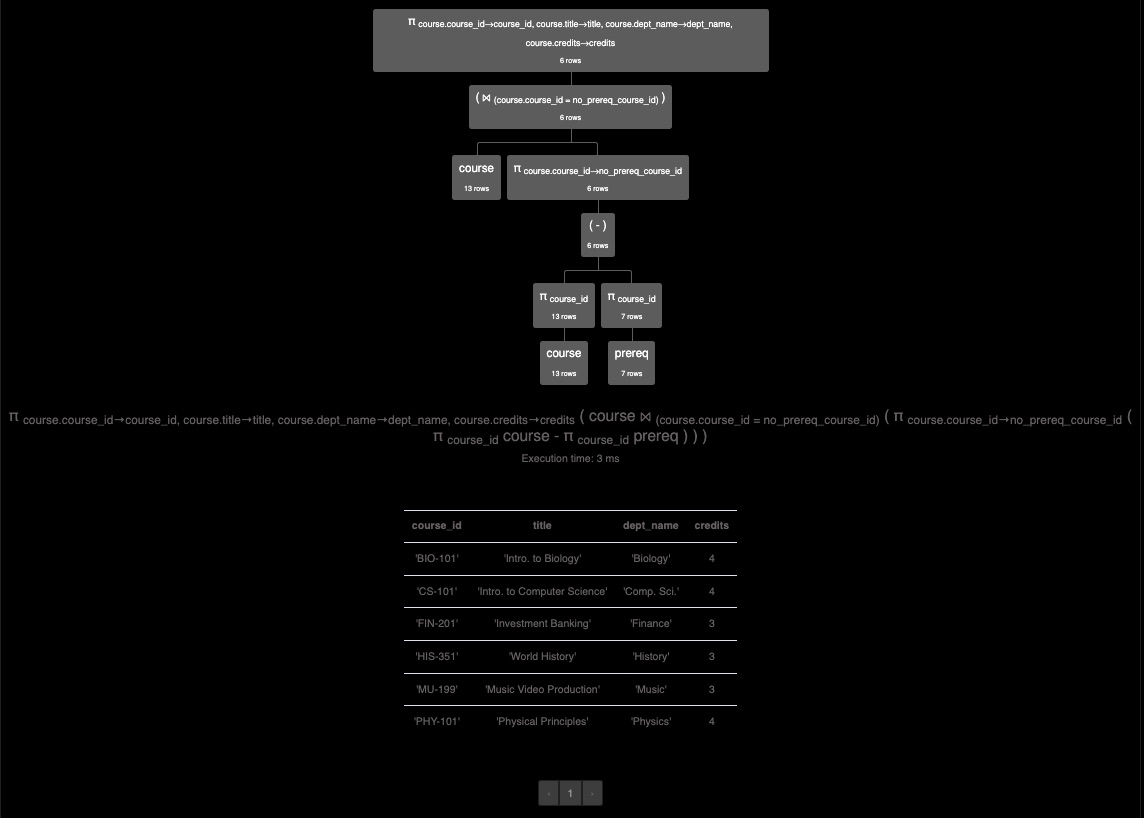

In [5]:
Image("R1.jpeg", width = 750)

| __R1 Execution Result__|

## R2

- Write a relational algebra query that produces a relation showing **students who have taken sections taught by their advisors**
    - A section is identified by `(course_id, sec_id, semester, year)`
- Your output should have the following columns (names should match exactly; there should be no prefixes):
    - `student_name`
    - `instructor_name`
    - `course_id`
    - `sec_id`
    - `semester`
    - `year`
    - `grade`
- You should use the `takes`, `teaches`, `advisor`, `student`, and `instructor` tables


- As an example, one row you should get is

| student_name | instructor_name | course_id | sec_id | semester | year | grade |
|--------------|-----------------|-----------|--------|----------|------|-------|
| 'Shankar'    | 'Srinivasan'    | 'CS-101'  | 1      | 'Fall'   | 2009 | 'C'   |

- Shankar took CS-101, section 1 in Fall of 2009, which was taught by Srinivasan. Additionally, Srinivasan advises Shankar

Algebra statement:

```
π student_name←student.name, instructor_name←instructor.name, course_id←teaches.course_id, sec_id←teaches.sec_id, semester←teaches.semester, year←teaches.year, grade←takes.grade (
	σ (teaches.course_id = takes.course_id ∧ teaches.sec_id =
	takes.sec_id ∧ teaches.semester = takes.semester ∧
	teaches.year = takes.year) (
		student ⨝ (student.ID = takes.ID) (
			instructor ⨝ (instructor.ID = teaches.ID) (
				teaches ⨝ (teaches.ID = advisor.i_id)
					(takes ⨝ (takes.ID = advisor.s_id) 
						advisor)
			)
		)
	)
)
```

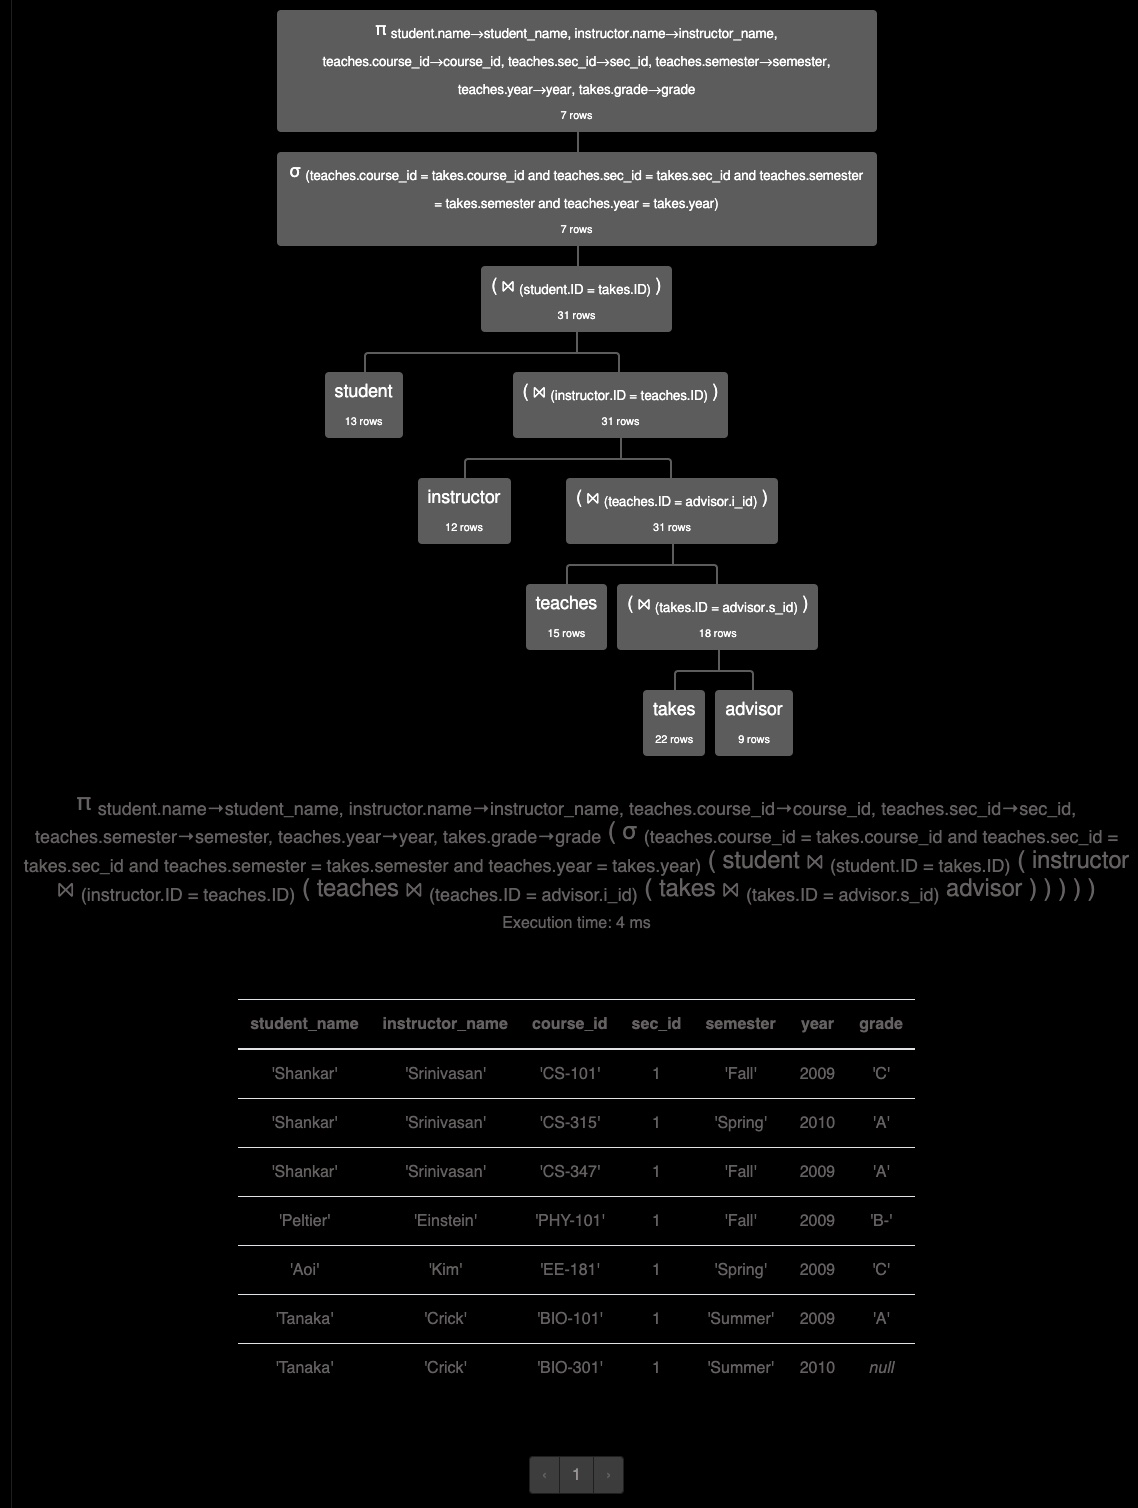

In [6]:
Image("R2.jpeg", width = 750)

| __R2 Execution Result__|

## R3

- Write a relational algebra query that produces a relation showing **sections that occur on Friday and start after 10 AM**
- Your output should have the following columns (names should match exactly; there should be no prefixes):
    - `course_title`
    - `sec_id`
    - `semester`
    - `year`
    - `day`
    - `start_hr`
- You should use the `course`, `section`, and `time_slot` tables

Algebra statement:

```
π course_title←course.title, sec_id←section.sec_id, semester←section.semester, year←section.year, day←time_slot.day, start_hr←time_slot.start_hr (
	course ⨝ (course.course_id = section.course_id) (
		section ⨝ (section.time_slot_id = time_slot.time_slot_id) (
			σ (time_slot.day = 'F' ∧ time_slot.start_hr >= 10) time_slot
		)
	)
)
```

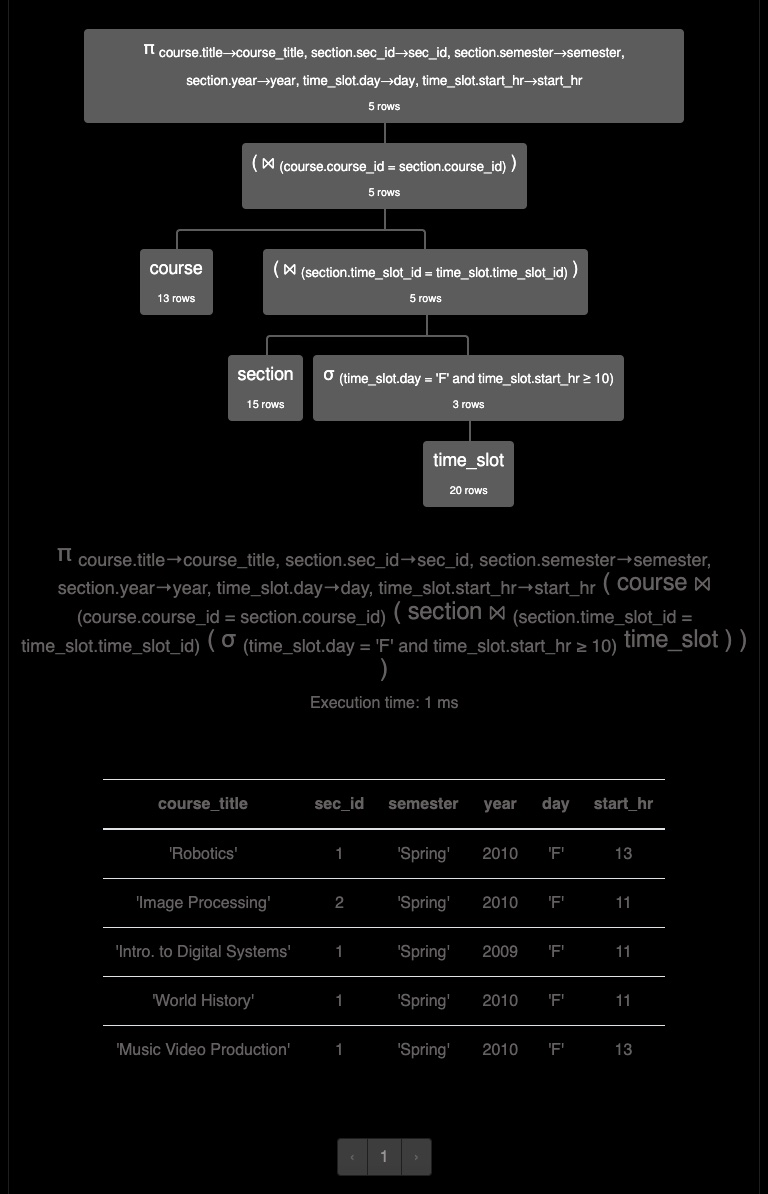

In [7]:
Image("R3.jpeg", width = 750)

| __R3 Execution Result__|